Kütuphaneleri import etme ve dosyayı görüntüleme

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel(r"C:\Users\Pc\Desktop\pusula_da\case.xlsx")

In [4]:
df.head() #İlk beş satırı verir

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [5]:
print(df.shape)  #satır ve sütun sayısı

(2235, 13)


In [6]:
print(df.info()) #sütunlar ve veri setinin büyüklüğü

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB
None


In [7]:
print(df.describe()) #İstatiksel verileri görmek için

             HastaNo          Yas
count    2235.000000  2235.000000
mean   145333.100224    47.327069
std       115.214248    15.208634
min    145134.000000     2.000000
25%    145235.000000    38.000000
50%    145331.000000    46.000000
75%    145432.000000    56.000000
max    145537.000000    92.000000


In [8]:
print(df.isnull().sum()) #eksik veriler 

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64


In [9]:
for col in df.columns:
    print(col, df[col].nunique()) #sütunların aldıkları değer sayılarını verir

HastaNo 404
Yas 75
Cinsiyet 2
KanGrubu 8
Uyruk 5
KronikHastalik 220
Bolum 10
Alerji 38
Tanilar 367
TedaviAdi 244
TedaviSuresi 23
UygulamaYerleri 37
UygulamaSuresi 10


In [10]:
hasta_cinsiyet = df.groupby("HastaNo")["Cinsiyet"].first()
print("Cinsiyeti Bilinmeyen Hasta Sayısı:", hasta_cinsiyet.isnull().sum())
print(hasta_cinsiyet.unique()) #hastaların cinsiyetlerini verir

Cinsiyeti Bilinmeyen Hasta Sayısı: 26
['Kadın' 'Erkek' None]


Text(0.5, 1.0, 'Cinsiyet Dağılımı')

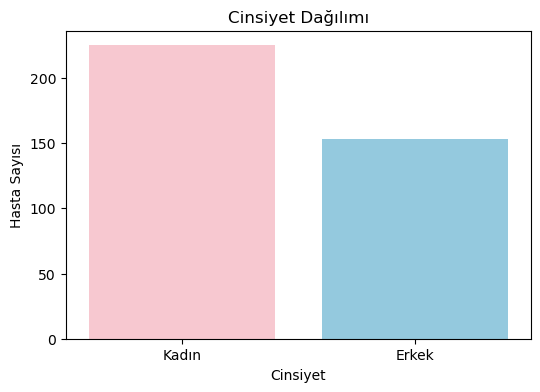

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=hasta_cinsiyet, data=df, palette=["pink","skyblue"])
plt.xlabel("Cinsiyet")
plt.ylabel("Hasta Sayısı")
plt.title("Cinsiyet Dağılımı")

In [12]:
hasta_tedavi=df.groupby("HastaNo")["TedaviAdi"].size()
print(hasta_tedavi)

HastaNo
145134     1
145135     5
145136     3
145137    12
145138     5
          ..
145533     5
145534     5
145535     5
145536     4
145537     3
Name: TedaviAdi, Length: 404, dtype: int64


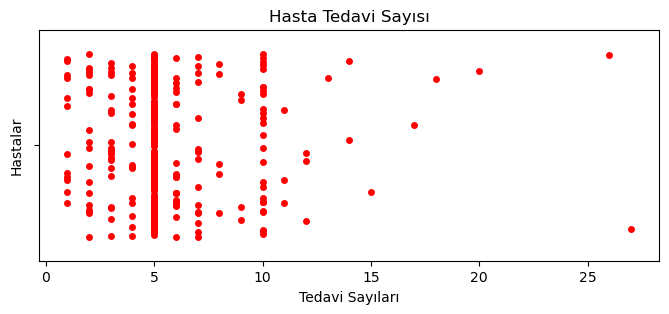

In [13]:
plt.figure(figsize=(8,3))
sns.stripplot(x=hasta_tedavi, color="red", size=5, jitter=0.4)
plt.title("Hasta Tedavi Sayısı")
plt.xlabel("Tedavi Sayıları")
plt.ylabel("Hastalar")
plt.show()

Yas
40    19
48    18
37    15
44    15
43    13
      ..
22     1
83     1
2      1
13     1
6      1
Name: count, Length: 75, dtype: int64


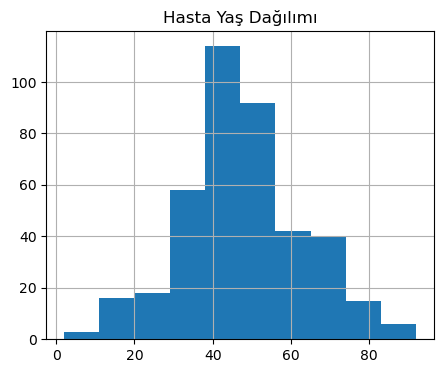

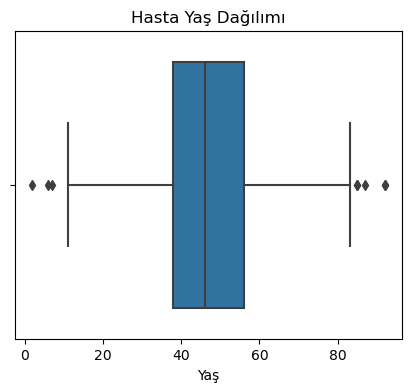

In [14]:
yas=df.groupby("HastaNo")["Yas"].first()
print(yas.value_counts())
yas.hist(figsize=(5,4), bins=10)
plt.title("Hasta Yaş Dağılımı")
plt.figure(figsize=(5,4))
sns.boxplot(x=yas)
plt.xlabel("Yaş")
plt.title("Hasta Yaş Dağılımı")
plt.show()

In [15]:
kan_grubu=df.groupby("HastaNo")["KanGrubu"].first()
print(kan_grubu.value_counts())

KanGrubu
0 Rh+     100
A Rh+      98
B Rh+      39
AB Rh+     15
B Rh-      13
A Rh-      11
0 Rh-       8
AB Rh-      2
Name: count, dtype: int64


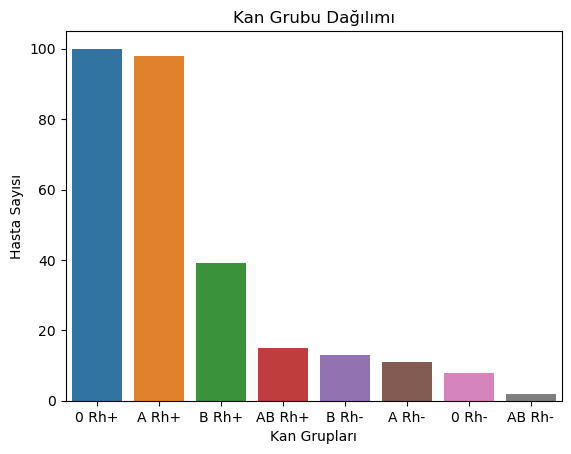

In [16]:
#Hastaların kan grubu dağılımlarının gösterimi
sns.countplot(x=kan_grubu, order=df["KanGrubu"].value_counts().index)
plt.title("Kan Grubu Dağılımı")
plt.ylabel("Hasta Sayısı")
plt.xlabel("Kan Grupları")
plt.show()

Uyruk
Türkiye       398
Azerbaycan      2
Libya           2
Tokelau         1
Arnavutluk      1
Name: count, dtype: int64


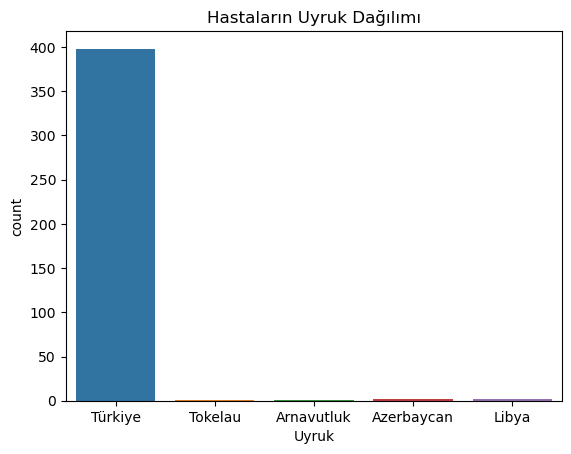

In [17]:
hasta_uyruk = df.groupby("HastaNo")["Uyruk"].first()
print(hasta_uyruk.value_counts())
sns.countplot(x=hasta_uyruk, order=df["Uyruk"].value_counts().index)
plt.title("Hastaların Uyruk Dağılımı")
plt.show()

In [18]:
print(df["KronikHastalik"].value_counts())
hastalik = df.groupby("HastaNo")["KronikHastalik"].first().dropna().str.split(",").explode().str.strip()
print("Kronik Hastalıklar: \n", hastalik.unique())
print(hastalik.value_counts())

KronikHastalik
Myastenia gravis                                                                38
Aritmi                                                                          36
Fascioscapulohumeral Distrofi                                                   36
Hipertiroidizm                                                                  34
Limb-Girdle Musküler Distrofi, Astım                                            34
                                                                                ..
Aritmi, Diyabet, Kalp yetmezliği, Hiportiroidizm                                 1
Fascioscapulohumeral Distrofi, Hiportiroidizm, Limb-Girdle Musküler Distrofi     1
Fascioscapulohumeral Distrofi, Myastenia gravis                                  1
Polimiyozit, Diyabet, Becker Musküler Distrofisi                                 1
Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği                      1
Name: count, Length: 220, dtype: int64
Kronik Hastalıklar: 
 ['Becker Mu

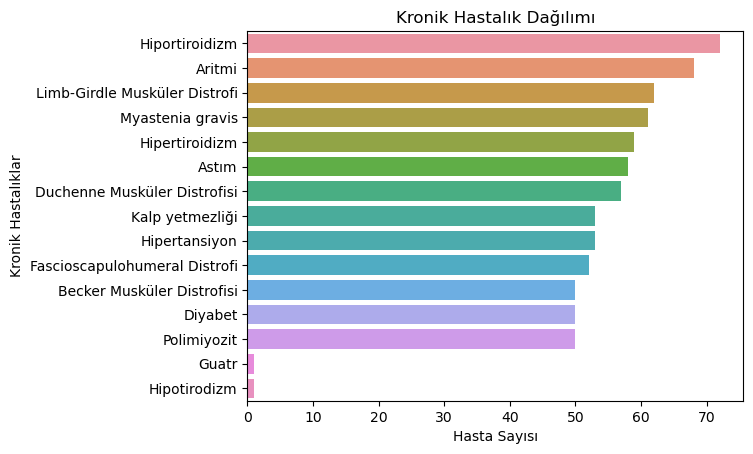

In [19]:
#Kronik Hastalıkların Görselleştirilmesi
sns.countplot(y=hastalik, order=hastalik.value_counts().index)
plt.title("Kronik Hastalık Dağılımı")
plt.ylabel("Kronik Hastalıklar")
plt.xlabel("Hasta Sayısı")
plt.show()

In [20]:
bolum=df.groupby("HastaNo")["Bolum"].first()
print(bolum.value_counts())

Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    363
Ortopedi Ve Travmatoloji                           23
İç Hastalıkları                                     6
Kardiyoloji                                         3
Nöroloji                                            3
Tıbbi Onkoloji                                      2
Kalp Ve Damar Cerrahisi                             1
Genel Cerrahi                                       1
Göğüs Hastalıkları                                  1
Name: count, dtype: int64


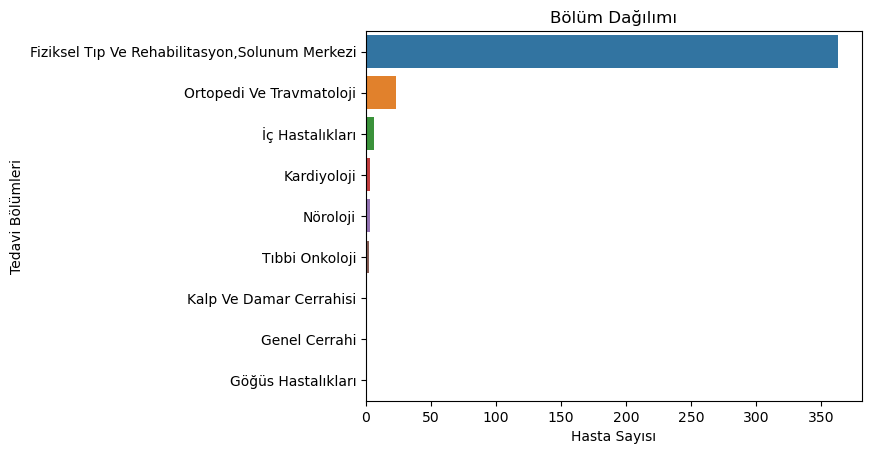

In [21]:
#Bölümlerin gösterimi
sns.countplot(y=bolum, order=bolum.value_counts().index)
plt.title("Bölüm Dağılımı")
plt.ylabel("Tedavi Bölümleri")
plt.xlabel("Hasta Sayısı")
plt.show()

In [22]:
alerji=df.groupby("HastaNo")["Alerji"].first().dropna().str.split(",").explode().str.strip()
print(alerji.unique())
print(alerji.value_counts())

['TOZ' 'POLEN' 'NOVALGIN' 'Polen' 'Toz' 'Yer Fıstığı' 'Novalgin' 'Sucuk'
 'Volteren' 'ARVELES' 'CORASPIN' 'VOLTAREN' 'GRİPİN' 'SUCUK' 'GRIPIN'
 'Voltaren']
Alerji
Polen          59
POLEN          31
Toz            28
TOZ            26
NOVALGIN       23
Sucuk          20
ARVELES        17
CORASPIN       17
Yer Fıstığı    16
Novalgin       15
SUCUK          12
GRİPİN         11
VOLTAREN        8
GRIPIN          7
Voltaren        7
Volteren        6
Name: count, dtype: int64


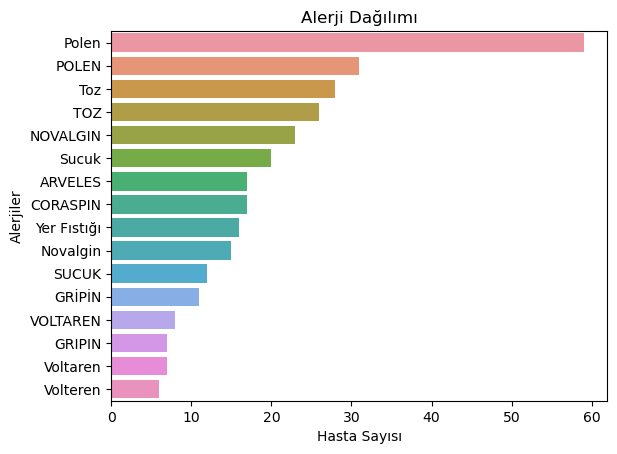

In [23]:
#Alerjilerin Görselleştirilmesi
sns.countplot(y=alerji, order=alerji.value_counts().index)
plt.title("Alerji Dağılımı")
plt.ylabel("Alerjiler")
plt.xlabel("Hasta Sayısı")
plt.show()

In [24]:
tanilar=df.groupby("HastaNo")["Tanilar"].first().dropna().str.split(",").explode().str.strip()
print(tanilar.unique())
print(tanilar.value_counts().head(10))

['Ayak bileği ve ayağın yüzeysel yaralanması' 'Omuzun darbe sendromu'
 'DORSALJİ' 'DİĞER' 'SERVİKOTORASİK BÖLGE' 'Parapleji ve tetrapleji'
 'Artroz' 'tanımlanmamış' 'el' 'Eklem ağrısı' 'Bisipital tendinit'
 'Lenfödem' 'başka yerde sınıflanmamış' 'Ekstremite ağrısı'
 'Esansiyel (primer) hipertansiyon' 'Diyabetes mellitüs'
 'diğer tanımlanmış' 'Kronik iskemik kalp hastalığı'
 'Mitral kapak yetmezliği' 'Deliryum' 'demans üzerine eklenen'
 'Parkinson hastalığı' 'Böbrek yetmezlikleri' 'Konjestif kalp yetmezliği'
 'Akut apandisit' 'peritoneal apse ile' 'Aşil tendon yaralanması'
 'İntervertebral disk bozuklukları' 'Ortopedik eklem implantı'
 'Gonartroz [diz ekleminin artrozu]' 'Spinal stenoz' 'LUMBOSAKRAL BÖLGE'
 'Radikülopati' 'Aterosklerotik kardiyovasküler hastalık'
 'Kalp yetmezliği' 'Kalp pili ayar ve kullanımı' 'Dorsalji'
 'Koksartroz [kalça artrozu]' 'Femur şaft kırığı' 'Menisküs yırtığı'
 'şimdiki' 'Halluks valgus (kazanılmış)' 'Baş ağrısı' 'diğer sendromları'
 'BİRDEN FAZLA YER' 'VER

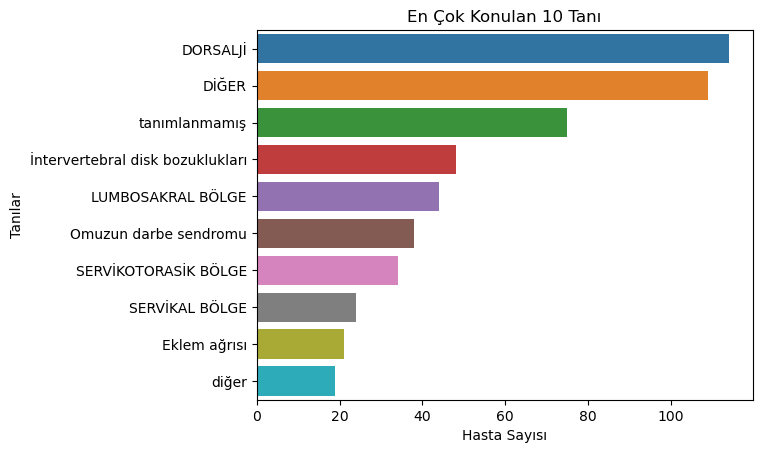

In [25]:
sns.countplot(y=tanilar, order=tanilar.value_counts().head(10).index)
plt.title("En Çok Konulan 10 Tanı")
plt.ylabel("Tanılar")
plt.xlabel("Hasta Sayısı")
plt.show()

In [26]:

tedavi_sure = df.groupby('Tanilar')['UygulamaSuresi'].first()

print(tedavi_sure)

Tanilar
'DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE,Lateral epikondilit                                                        20 Dakika
ARTİKÜLER KIKIRDAK DİĞER BOZUKLUKLARI, OMUZ BÖLGESİ,Omuzun darbe sendromu                                       5 Dakika
Algonörodistrofi                                                                                               20 Dakika
Algonörodistrofi,Ayak kırığı, ayak bileği hariç                                                                20 Dakika
Algonörodistrofi, Ayak kırığı, ayak bileği hariç                                                               20 Dakika
                                                                                                                 ...    
İntervertebral disk bozuklukları, tanımlanmamış,Boyun ağrısı                                                   20 Dakika
İntervertebral disk bozuklukları, tanımlanmamış,DORSALJİ, DİĞER, SERVİKAL BÖLGE                                 5 Dakika
İntervertebral disk bozu

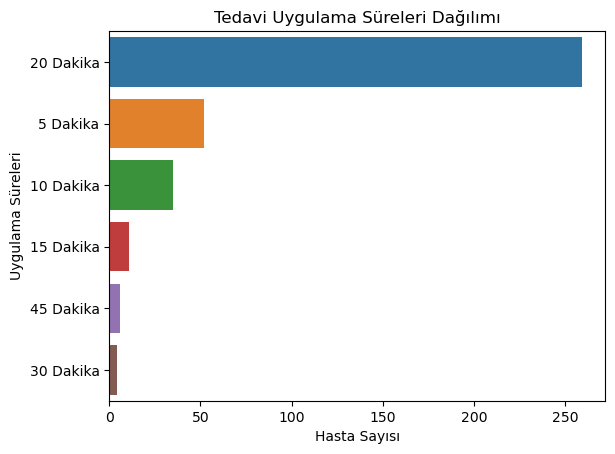

In [27]:
sns.countplot(y=tedavi_sure, order=tedavi_sure.value_counts().index)
plt.title("Tedavi Uygulama Süreleri Dağılımı")
plt.ylabel("Uygulama Süreleri")
plt.xlabel("Hasta Sayısı")
plt.show()

In [44]:
import re
def sure_num(s):
    if pd.isna(s):
        return None
    s = str(s).lower().strip()
    match = re.search(r'(\d+)', s)
    if match:
        return int(match.group(1))
    else:
        return None
df["UygulamaSuresi_Dk"] = df["UygulamaSuresi"].map(sure_num)
df["TedaviSuresi_Seans"] = df["TedaviSuresi"].map(sure_num)


In [45]:
df.groupby(["HastaNo","UygulamaYerleri"]).first().describe()["UygulamaSuresi_Dk"]

count    516.000000
mean      17.470930
std        6.914817
min        5.000000
25%       15.000000
50%       20.000000
75%       20.000000
max       45.000000
Name: UygulamaSuresi_Dk, dtype: float64

In [46]:
df.isnull().sum()

HastaNo                 0
Yas                     0
Cinsiyet              169
KanGrubu              675
Uyruk                   0
KronikHastalik        611
Bolum                  11
Alerji                944
Tanilar                75
TedaviAdi               0
TedaviSuresi            0
UygulamaYerleri       221
UygulamaSuresi          0
UygulamaSuresi_Dk       0
TedaviSuresi_Seans      0
dtype: int64

In [47]:
fd=df.copy()
print("Tekrar eden satır sayısı:", fd.duplicated().sum())
fd = fd.drop_duplicates()  # Tüm sütunlara göre tekrar eden satırları sil


Tekrar eden satır sayısı: 928


In [48]:
print(fd.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 2234
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   HastaNo             1307 non-null   int64 
 1   Yas                 1307 non-null   int64 
 2   Cinsiyet            1203 non-null   object
 3   KanGrubu            942 non-null    object
 4   Uyruk               1307 non-null   object
 5   KronikHastalik      962 non-null    object
 6   Bolum               1300 non-null   object
 7   Alerji              767 non-null    object
 8   Tanilar             1261 non-null   object
 9   TedaviAdi           1307 non-null   object
 10  TedaviSuresi        1307 non-null   object
 11  UygulamaYerleri     1150 non-null   object
 12  UygulamaSuresi      1307 non-null   object
 13  UygulamaSuresi_Dk   1307 non-null   int64 
 14  TedaviSuresi_Seans  1307 non-null   int64 
dtypes: int64(4), object(11)
memory usage: 163.4+ KB
None


In [50]:
#Veri setinde türkçe karakterler dönüştürüldü ve unicode hataları silindi
import unicodedata


def normalize_text(text):
        if pd.isna(text):
            return text
        replacements = {
            "ı": "i",
            "ş": "s",
            "ç": "c",
            "ö": "o",
            "ü": "u",
            "ğ": "g"
        }
        for wrong, right in replacements.items():
            text = text.replace(wrong, right).strip().lower()

        text = re.sub(r"[\u200b\u200c\u200d\uFEFF]", "", text).strip()
        text = re.sub(r"%+", "", text).strip()
        text = re.sub(r"\\x[a-f0-9]{2}", "", text).strip()
        text = re.sub(r"[^\w\s]", " ", text).strip()
        text = re.sub(r"\s+", " ", text).strip()
        text = unicodedata.normalize("NFKC", text)
        return text
def normalized(fd):
   
    for col in fd.select_dtypes(include=['object', 'string']).columns:
        fd[col] = fd[col].astype(str).apply(normalize_text)
    
    return fd
  

fd=normalized(fd)
fd.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,UygulamaSuresi_Dk,TedaviSuresi_Seans
0,145134,60,kadin,0 rh,turkiye,becker muskuler distrofisi hiportiroidizm kalp...,fiziksel tip ve rehabilitasyon solunum merkezi,toz,ayak bilegi ve ayagin yuzeysel yaralanmasi,ayak bilegi,5 seans,ayak bilegi,20 dakika,20,5
1,145135,28,erkek,0 rh,turkiye,duchenne muskuler distrofisi myastenia gravis ...,fiziksel tip ve rehabilitasyon solunum merkezi,nan,omuzun darbe sendromu dorsalji di ger servi ko...,dorsalji boyun trapez skapular,15 seans,boyun,20 dakika,20,15
2,145135,28,erkek,0 rh,turkiye,duchenne muskuler distrofisi myastenia gravis ...,fiziksel tip ve rehabilitasyon solunum merkezi,nan,omuzun darbe sendromu dorsalji di ger servi ko...,dorsalji boyun trapez skapular,15 seans,boyun sirt,20 dakika,20,15
3,145135,28,erkek,0 rh,turkiye,duchenne muskuler distrofisi myastenia gravis ...,fiziksel tip ve rehabilitasyon solunum merkezi,nan,omuzun darbe sendromu dorsalji di ger servi ko...,dorsalji boyun trapez skapular,15 seans,boyun,5 dakika,5,15
6,145136,60,erkek,0 rh,turkiye,nan,fiziksel tip ve rehabilitasyon solunum merkezi,polen novalgin,parapleji ve tetrapleji,parapleji,10 seans,nan,30 dakika,30,10


In [51]:
#Sütunlarda yanlış yazılan kelimeler manuel sözlük oluşturularak düzeltildi
def sutun_deger(fd, column, groupby_col="HastaNo", mapping=None):

    series_temp = fd.groupby(groupby_col)[column].first().fillna('').str.split(',')
    
    series_temp = series_temp.apply(
        lambda x: [normalize_text(item.strip().lower()) for item in x]
    
    )
    if mapping:
        series_temp = series_temp.apply(
            lambda x: [mapping.get(item, item) for item in x]
        )
    
    series_cleaned = series_temp.apply(lambda x: ','.join(sorted(list(set(x)))))
    fd[column] = fd.apply(lambda row: series_cleaned.loc[row[groupby_col]], axis=1)

    
    series_unique = series_cleaned.str.split(',').explode().unique()
    print(f"\n--- {column} ---")
    print("Benzersiz Değerler:", series_unique)
    print("Toplam farklı değer:", len(series_unique))
    

mapping_tani = {
    "di ger":"diger",
    "sırt agrisi": "dorsalji",
    "dorsalji": "dorsalji",
    "bas agrisi": "bas agrisi",
    "boyun agrisi": "boyun agrisi",
    "eklem agrisi": "eklem agrisi",
    "ayak agrisi": "ayak agrisi",
    "ayak bilegi ve ayagin yuzeysel yaralanmasi": "ayak bilegi yaralanmasi",
    "gonartroz diz ekleminin artrozu": "gonartroz",
    "koksartroz kalca artrozu": "koksartroz",
    "diyabetes mellitus": "diyabet",
    "hipertansyn": "hipertansiyon",
    "hipertansıyon": "hipertansiyon",
    "diaybet": "diyabet",
    "diabet": "diyabet",
    "biseps diğer kısımlarının kas ve tendon yaralanması": "kas ve tendon yaralanmasi",
    "i ntervertebral disk bozukluklari": "intervertebral disk bozukluğu",
    "i ntrehepatik safra yolu karsinomu": "intrahepatik safra yolu karsinomu",
    "dorsalji ": "dorsalji",
    "baska yerde siniflanmamis": "tanimlanmamis"
}

mapping_alerji = {
    "gri pi n": "gripin",
    "volteren": "voltaren"
}

mapping_kronik = {
    "hiportiroidizm": "hipotiroidizm",
    "hipotirodizm":"hipotiroidizm",
    "kalp hastaligi": "kalp hastaligi"
}

tanilar_series = sutun_deger(fd, "Tanilar", mapping=mapping_tani)
alerjiler_series = sutun_deger(fd, "Alerji", mapping=mapping_alerji)
kronik_series = sutun_deger(fd, "KronikHastalik", mapping=mapping_kronik)


--- Tanilar ---
Benzersiz Değerler: ['ayak bilegi yaralanmasi'
 'omuzun darbe sendromu dorsalji di ger servi kotorasi k bolge'
 'parapleji ve tetrapleji' 'artroz tanimlanmamis el' 'eklem agrisi'
 'bisipital tendinit' 'dorsalji di ger servi kotorasi k bolge'
 'lenfodem baska yerde siniflanmamis ekstremite agrisi'
 'esansiyel primer hipertansiyon diyabetes mellitus diger tanimlanmis kronik iskemik kalp hastaligi mitral kapak yetmezligi deliryum demans uzerine eklenen parkinson hastaligi bobrek yetmezlikleri tanimlanmamis konjestif kalp yetmezligi akut apandisit peritoneal apse ile'
 'asil tendon yaralanmasi'
 'i ntervertebral disk bozukluklari tanimlanmamis'
 'ortopedik eklem implanti'
 'gonartroz diz ekleminin artrozu spinal stenoz'
 'dorsalji di ger lumbosakral bolge radikulopati'
 'aterosklerotik kardiyovaskuler hastalik kalp yetmezligi tanimlanmamis kalp pili ayar ve kullanimi'
 'dorsalji tanimlanmamis' 'koksartroz' 'femur saft kirigi'
 'meniskus yirtigi simdiki' 'dorsalji di ger lu

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,UygulamaSuresi_Dk,TedaviSuresi_Seans
0,145134,60,kadin,0 rh,turkiye,becker muskuler distrofisi hipotiroidizm kalp ...,fiziksel tip ve rehabilitasyon solunum merkezi,toz,ayak bilegi yaralanmasi,ayak bilegi,5 seans,ayak bilegi,20 dakika,20,5
1,145135,28,erkek,0 rh,turkiye,becker muskuler distrofisi duchenne muskuler d...,fiziksel tip ve rehabilitasyon solunum merkezi,,diger dorsalji omuzun darbe sendromu servi kot...,dorsalji boyun trapez skapular,15 seans,boyun,20 dakika,20,15
2,145135,28,erkek,0 rh,turkiye,becker muskuler distrofisi duchenne muskuler d...,fiziksel tip ve rehabilitasyon solunum merkezi,,diger dorsalji omuzun darbe sendromu servi kot...,dorsalji boyun trapez skapular,15 seans,boyun sirt,20 dakika,20,15
3,145135,28,erkek,0 rh,turkiye,becker muskuler distrofisi duchenne muskuler d...,fiziksel tip ve rehabilitasyon solunum merkezi,,diger dorsalji omuzun darbe sendromu servi kot...,dorsalji boyun trapez skapular,15 seans,boyun,5 dakika,5,15
6,145136,60,erkek,0 rh,turkiye,,fiziksel tip ve rehabilitasyon solunum merkezi,novalgin polen,parapleji ve tetrapleji,parapleji,10 seans,nan,30 dakika,30,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,145536,48,erkek,nan,turkiye,aritmi fascioscapulohumeral distrofi hipotiroi...,fiziksel tip ve rehabilitasyon solunum merkezi,arveles coraspin,eklemin kontrakturu,ekstansor tendon rehabilitasyon,15 seans,sol el bilek bolgesi,20 dakika,20,15
2230,145536,48,erkek,nan,turkiye,aritmi fascioscapulohumeral distrofi hipotiroi...,fiziksel tip ve rehabilitasyon solunum merkezi,arveles coraspin,eklemin kontrakturu,ekstansor tendon rehabilitasyon,15 seans,sol el bilek bolgesi,10 dakika,10,15
2232,145537,33,kadin,a rh,turkiye,,fiziksel tip ve rehabilitasyon solunum merkezi,sucuk,algonorodistrofi asil tendon yaralanmasi ayak ...,asil rupturu rehabilitasyonu,15 seans,sol ayak bilegi bolgesi,20 dakika,20,15
2233,145537,33,kadin,a rh,turkiye,,fiziksel tip ve rehabilitasyon solunum merkezi,sucuk,algonorodistrofi asil tendon yaralanmasi ayak ...,asil rupturu rehabilitasyonu,15 seans,sol ayak bilegi bolgesi,15 dakika,15,15


In [53]:
#Sayısal veriler Ortalama değerler ile dolduruldu
for col in ["Yas","UygulamaSuresi_dk","TedaviSuresi_Seans"]:
    if col in fd.columns and fd[col].isna().any():
        fd[col] = fd[col].fillna(fd[col].median())
#String veriler de ortalama değerlerle dolduruldu
basic_cat = ["Cinsiyet","KanGrubu","Uyruk","Bolum","TedaviAdi"]
for c in basic_cat:
    if c in fd.columns:
        fd[c] = fd[c].fillna("bilinmiyor")

multi_cols = ["Alerji","KronikHastalik","UygulamaYerleri","Tanilar"]
for c in multi_cols:
    if c in fd.columns:
        fd[c] = fd[c].fillna("")
print(fd.isnull().sum())

HastaNo               0
Yas                   0
Cinsiyet              0
KanGrubu              0
Uyruk                 0
KronikHastalik        0
Bolum                 0
Alerji                0
Tanilar               0
TedaviAdi             0
TedaviSuresi          0
UygulamaYerleri       0
UygulamaSuresi        0
UygulamaSuresi_Dk     0
TedaviSuresi_Seans    0
dtype: int64


In [56]:
fd #veri setinin son hali

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,UygulamaSuresi_Dk,TedaviSuresi_Seans
0,145134,60,kadin,0 rh,turkiye,becker muskuler distrofisi hiportiroidizm kalp...,fiziksel tip ve rehabilitasyon solunum merkezi,toz,ayak bilegi yaralanmasi,ayak bilegi,5 seans,ayak bilegi,20 dakika,20,5
1,145135,28,erkek,0 rh,turkiye,duchenne muskuler distrofisi myastenia gravis ...,fiziksel tip ve rehabilitasyon solunum merkezi,nan,omuzun darbe sendromu dorsalji di ger servi ko...,dorsalji boyun trapez skapular,15 seans,boyun,20 dakika,20,15
2,145135,28,erkek,0 rh,turkiye,duchenne muskuler distrofisi myastenia gravis ...,fiziksel tip ve rehabilitasyon solunum merkezi,nan,omuzun darbe sendromu dorsalji di ger servi ko...,dorsalji boyun trapez skapular,15 seans,boyun sirt,20 dakika,20,15
3,145135,28,erkek,0 rh,turkiye,duchenne muskuler distrofisi myastenia gravis ...,fiziksel tip ve rehabilitasyon solunum merkezi,nan,omuzun darbe sendromu dorsalji di ger servi ko...,dorsalji boyun trapez skapular,15 seans,boyun,5 dakika,5,15
6,145136,60,erkek,0 rh,turkiye,nan,fiziksel tip ve rehabilitasyon solunum merkezi,polen novalgin,parapleji ve tetrapleji,parapleji,10 seans,nan,30 dakika,30,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,145536,48,erkek,nan,turkiye,aritmi myastenia gravis fascioscapulohumeral d...,fiziksel tip ve rehabilitasyon solunum merkezi,arveles coraspin,eklemin kontrakturu,ekstansor tendon rehabilitasyon,15 seans,sol el bilek bolgesi,20 dakika,20,15
2230,145536,48,erkek,nan,turkiye,aritmi myastenia gravis fascioscapulohumeral d...,fiziksel tip ve rehabilitasyon solunum merkezi,arveles coraspin,eklemin kontrakturu,ekstansor tendon rehabilitasyon,15 seans,sol el bilek bolgesi,10 dakika,10,15
2232,145537,33,kadin,a rh,turkiye,nan,fiziksel tip ve rehabilitasyon solunum merkezi,sucuk,asil tendon yaralanmasi algonorodistrofi ayak ...,asil rupturu rehabilitasyonu,15 seans,sol ayak bilegi bolgesi,20 dakika,20,15
2233,145537,33,kadin,a rh,turkiye,nan,fiziksel tip ve rehabilitasyon solunum merkezi,sucuk,asil tendon yaralanmasi algonorodistrofi ayak ...,asil rupturu rehabilitasyonu,15 seans,sol ayak bilegi bolgesi,15 dakika,15,15
